In [1]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def calc_avg_channel(power_recording, noise_indices):
    # Initialize a list of lists for channels.
    channels = [[] for _ in range(14)]
    
    # Populate channels, skipping noise indices.
    for idx, epoch in enumerate(power_recording):
        if idx not in noise_indices:
            for channel_idx, value in enumerate(epoch[:14]):  # Assume there are at least 14 channels in epoch.
                channels[channel_idx].append(value)
    
    # Compute the mean of each channel.
    channel_means = np.array([np.mean(channel, axis = 0) if len(channel) > 0 else 0 for channel in channels])
    
    return channel_means

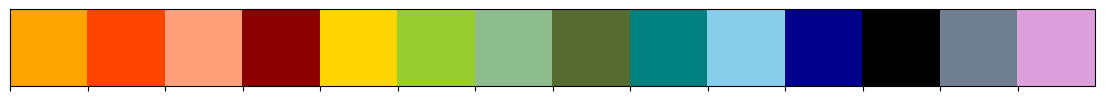

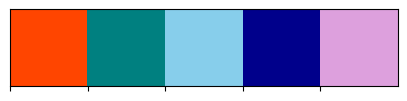

In [4]:
channel_colors = ['orange', 'orangered','lightsalmon','darkred', 'gold','yellowgreen','darkseagreen','darkolivegreen',
                  'teal', 'skyblue', 'darkblue','black', 'slategrey', 'plum']
sns.palplot(channel_colors)

animal_colors = ['orangered', 'teal', 'skyblue', 'darkblue', 'plum']
sns.palplot(animal_colors)

## No preprocessing applied 

In [6]:
animal_list = ['S7068', 'S7083', 'S7070','S7071', 'S7074']
all_data = []
for animal in animal_list:
    clean_indices_dir = '/home/melissa/PREPROCESSING/SYNGAP1/cleaned_br_files/'
    clean_indices = pd.read_pickle(str(clean_indices_dir) + (animal) + '_BL1.pkl')
    noise_indices = clean_indices.loc[clean_indices['brainstate'] == 6]
    indices = list(noise_indices.index)
    power_recording_dir = '/home/melissa/RESULTS/ICASSP/ALL_EPOCHS/Power/'
    power_recording = np.load(str(power_recording_dir) + str(animal) + '_power_all_epochs_br_1.npy')
    all_channels_mean = calc_avg_channel(power_recording, indices)
    channel_power = all_channels_mean[3] 
    freq = np.arange(0, 125.4, 0.2)
    dict_to_plot = {'Animal': [animal]*len(channel_power),
                     'Frequency': freq, 'Power': channel_power}
    df_to_plot = pd.DataFrame(data = dict_to_plot)
    all_data.append(df_to_plot)   
df_plot = pd.concat(all_data)
    

Text(0.5, 0.96, 'Before Artifact Removal')

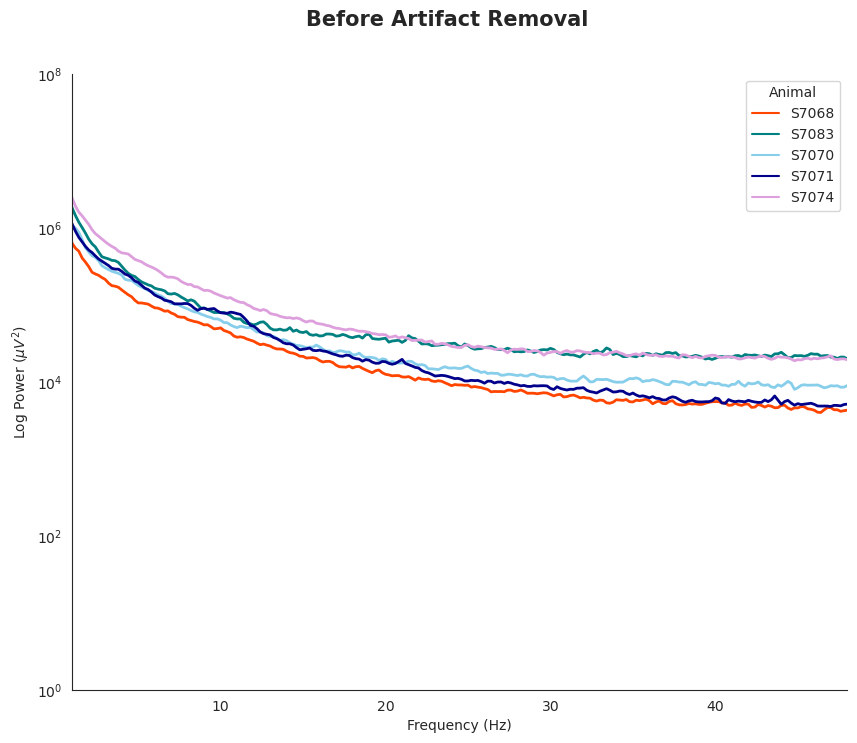

In [8]:
sns.set_style("white")
fig, axs = plt.subplots(1, 1, figsize=(10,8), sharex = True, sharey = True)
sns.lineplot(data = df_plot, x = 'Frequency', y = 'Power', hue = 'Animal', 
             errorbar = ('se'), linewidth = 2, palette = animal_colors)

#remove the figure border
sns.despine()

#set limits and labels for the x and y axis
axs.set_yscale('log')
axs.set_xlim(1, 48)
axs.set_ylim(10**0, 10**8)
axs.set_xlabel("Frequency (Hz)")
axs.set_ylabel(r"Log Power ($\mu V^2$)")
fig.suptitle('Before Artifact Removal', y = 0.96, fontsize = 15, 
            fontweight = 'bold') 


## After Removing Indices Outside of Threshold 

In [9]:
animal_list = ['S7068', 'S7083', 'S7070','S7071', 'S7074'] 
all_data = []
for animal in animal_list:
    int_slope_dir = '/home/melissa/RESULTS/ICASSP/ALL_EPOCHS/Int_Slope/'
    slope_df = pd.read_csv(int_slope_dir + str(animal) + '_br_1_all_epochs.csv')
    noise_indices = slope_df.loc[slope_df['Slope'] < -8]
    unq_noise_indices = np.unique(noise_indices['Epoch'])
    power_recording_dir = '/home/melissa/RESULTS/ICASSP/ALL_EPOCHS/Power/'
    power_recording = np.load(str(power_recording_dir) + str(animal) + '_power_all_epochs_br_1.npy')
    all_channels_mean = calc_avg_channel(power_recording, unq_noise_indices)
    channel_power = all_channels_mean[3]
    freq = np.arange(0, 125.4, 0.2)
    dict_to_plot = {'Animal': [animal]*len(channel_power),
                     'Frequency': freq, 'Power': channel_power} 
    df_to_plot = pd.DataFrame(data = dict_to_plot)
    all_data.append(df_to_plot)   
df_plot = pd.concat(all_data)

Text(0.5, 0.96, 'After Artifact Removal')

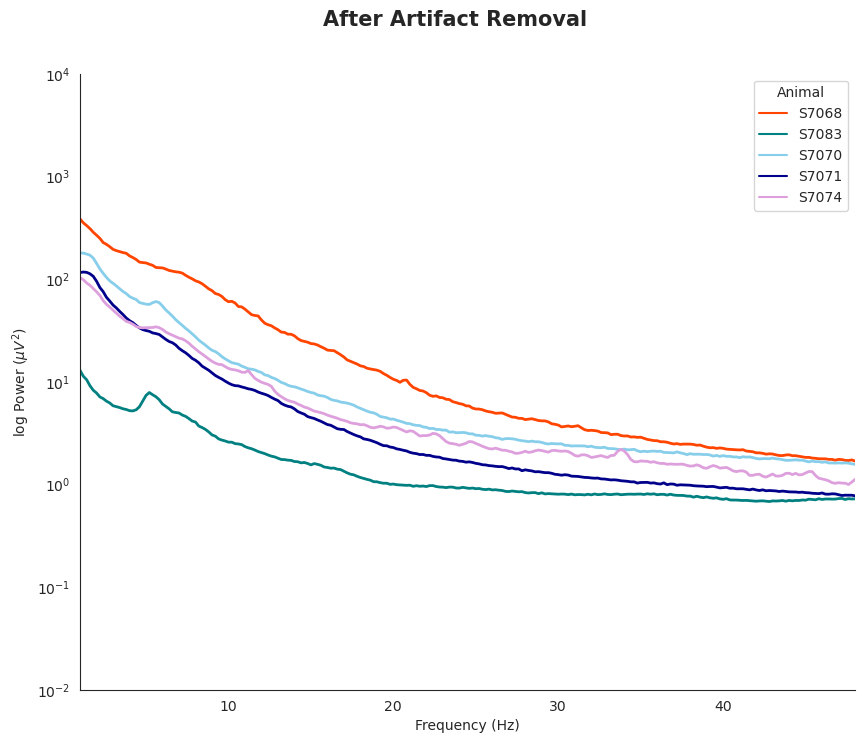

In [11]:
sns.set_style("white")
fig, axs = plt.subplots(1, 1, figsize=(10,8), sharex = True, sharey = True)
sns.lineplot(data = df_plot, x = 'Frequency', y = 'Power', hue = 'Animal', 
             errorbar = ('se'), linewidth = 2, palette = animal_colors)

#remove the figure border
sns.despine()

#set limits and labels for the x and y axis
axs.set_yscale('log')
axs.set_xlim(1, 48)
axs.set_ylim(10**-2, 10**4)
axs.set_xlabel("Frequency (Hz)")
axs.set_ylabel(r"log Power ($\mu V^2$)")
fig.suptitle('After Artifact Removal', y = 0.96, fontsize = 15, 
            fontweight = 'bold') 